## Name : Adwaiy Singh
## Reg. No. : 220968424
## Sec. : A
## Batch: 2

# Week 3
## Linear and MultiLinear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../data/household_power_consumption.txt", delimiter=';')
df

/var/folders/3w/28ckyzw57s32qmdh2v_twkhc0000gn/T/ipykernel_51784/3127458311.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/household_power_consumption.txt", delimiter=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [3]:
del df['Date']
del df['Time']

In [4]:
print(df.shape)

(2075259, 7)


In [5]:
df = df.apply(pd.to_numeric, errors='coerce')

In [6]:
def removeOutliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3  = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df_low = Q1 - 1.5*IQR
    df_hi = Q3 + 1.5*IQR
    new_df = df[(df[col] < df_hi) & (df[col] > df_low)].reset_index(drop=True)
    return new_df

df = removeOutliers(df,'Global_intensity')
df = removeOutliers(df,'Voltage')

In [7]:
df.dropna()
print(df.shape)

(1897454, 7)


In [8]:
x = df[['Global_intensity']]
y = df[['Voltage']]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [10]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1328217, 1) (569237, 1) (1328217, 1) (569237, 1)


In [11]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [12]:
print(reg.coef_)
print(reg.intercept_)

[[-0.27419517]]
[242.21065064]


In [13]:
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_pred = reg.predict(x_range)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


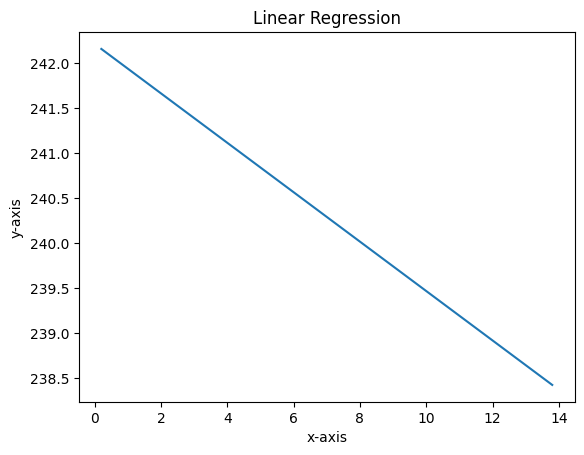

In [14]:
# plt.scatter(x, y)
plt.plot(x_range, y_pred)

plt.title("Linear Regression")
plt.ylabel("y-axis")
plt.xlabel("x-axis")

plt.show()

In [15]:
y_pred = reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r = r2_score(y_test, y_pred)
print(mse)
print(r)

7.049021714973956
0.09672055182810402


In [16]:
df['Global_intensity'].corr(df['Voltage'])

-0.3124051565255588

In [17]:
df.shape

(1897454, 7)

In [18]:
for col in df.columns:
    if col not in ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
        df = removeOutliers(df,col) 

In [19]:
df.dropna()
print(df.shape)

(1838609, 7)


In [20]:
x1 = df.values
y1 = df[['Voltage']]

In [21]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=0)

In [22]:
print(x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape)

(1287026, 7) (551583, 7) (1287026, 1) (551583, 1)


In [23]:
reg1 = LinearRegression()
reg1.fit(x1_train, y1_train)

LinearRegression()

In [24]:
print(reg1.coef_)
print(reg1.intercept_)

[[-1.65756513e-16 -8.90953977e-15  1.00000000e+00 -1.75823040e-15
  -8.04598962e-17  2.76610931e-16  1.92391847e-16]]
[-2.75406364e-11]


In [25]:
# sns.pairplot(df)
# commented cause taling too long

In [26]:
y1_pred = reg1.predict(x1_test)

mse1 = mean_squared_error(y1_test, y1_pred)
r1 = r2_score(y1_test, y1_pred)
print(mse1)
print(r1)

9.37833427939128e-22
1.0
